In [1]:
import os

In [2]:
import glob


In [3]:
base_dir = os.path.join('./cell_images')

In [4]:
infected_dir = os.path.join(base_dir,'Parasitized')

In [5]:
healthy_dir = os.path.join(base_dir,'Uninfected')

In [6]:
infected_files = glob.glob(infected_dir+'/*.png')

In [7]:
healthy_files = glob.glob(healthy_dir+'/*.png')


In [8]:
len(infected_files)

13779

In [9]:
len(healthy_files)

13779

In [10]:
import numpy as np
import pandas as pd

In [11]:
np.random.seed(42)


In [12]:
files_df = pd.DataFrame({
    'filename': infected_files + healthy_files,
    'label': ['malaria'] * len(infected_files) + ['healthy'] * len(healthy_files)
}).sample(frac=1, random_state=42).reset_index(drop=True)

files_df.head()


,filename,label
0,./cell_images/Parasitized/C109P70ThinF_IMG_201...,malaria
1,./cell_images/Parasitized/C118P79ThinF_IMG_201...,malaria
2,./cell_images/Uninfected/C64P25N_ThinF_IMG_201...,healthy
3,./cell_images/Uninfected/C106P67ThinF_IMG_2015...,healthy
4,./cell_images/Uninfected/C134P95ThinF_IMG_2015...,healthy


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from collections import Counter

In [15]:
train_files, test_files, train_labels, test_labels = train_test_split(files_df['filename'].values, files_df['label'].values, test_size=0.3, random_state=42)

In [16]:
train_files, val_files, train_labels, val_labels = train_test_split(train_files,
                                                                    train_labels, 
                                                                    test_size=0.1, random_state=42)

In [17]:
print(train_files.shape, val_files.shape, test_files.shape)


(17361,) (1929,) (8268,)


In [18]:
print('Train:', Counter(train_labels), '\nVal:', Counter(val_labels), '\nTest:', Counter(test_labels))

Train: Counter({'healthy': 8734, 'malaria': 8627}) 
Val: Counter({'healthy': 970, 'malaria': 959}) 
Test: Counter({'malaria': 4193, 'healthy': 4075})


In [19]:
from concurrent import futures


In [20]:
import threading


In [23]:
import os, sys
sys.path.append(os.path.join(os.path.dirname('acedProject'), "lib"))

In [25]:
import sys,os
sys.path.append(os.getcwd())

In [28]:
os.sys.path

['/home/rohit/machinelearning/acedProject',
 '/home/rohit/anaconda3/lib/python37.zip',
 '/home/rohit/anaconda3/lib/python3.7',
 '/home/rohit/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/rohit/anaconda3/lib/python3.7/site-packages',
 '/home/rohit/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/rohit/.ipython',
 'lib',
 '/home/rohit/machinelearning/acedProject']

In [21]:
import cv2


In [22]:
def get_img_shape_parallel(idx, img, total_imgs):
    if idx % 5000 == 0 or idx == (total_imgs - 1):
        print('{}: working on img num: {}'.format(threading.current_thread().name,
                                                  idx))
    return cv2.imread(img).shape
 

In [23]:
  
ex = futures.ThreadPoolExecutor(max_workers=None)
data_inp = [(idx, img, len(train_files)) for idx, img in enumerate(train_files)]
print('Starting Img shape computation:')
train_img_dims_map = ex.map(get_img_shape_parallel, 
                            [record[0] for record in data_inp],
                            [record[1] for record in data_inp],
                            [record[2] for record in data_inp])
train_img_dims = list(train_img_dims_map)
print('Min Dimensions:', np.min(train_img_dims, axis=0)) 
print('Avg Dimensions:', np.mean(train_img_dims, axis=0))
print('Median Dimensions:', np.median(train_img_dims, axis=0))
print('Max Dimensions:', np.max(train_img_dims, axis=0))

Starting Img shape computation:
ThreadPoolExecutor-0_0: working on img num: 0
ThreadPoolExecutor-0_10: working on img num: 5000
ThreadPoolExecutor-0_5: working on img num: 10000
ThreadPoolExecutor-0_14: working on img num: 15000
ThreadPoolExecutor-0_1: working on img num: 17360
Min Dimensions: [46 46  3]
Avg Dimensions: [132.97978227 132.4216347    3.        ]
Median Dimensions: [130. 130.   3.]
Max Dimensions: [385 364   3]


In [24]:
IMG_DIMS = (125, 125)


In [25]:

def get_img_data_parallel(idx, img, total_imgs):
    if idx % 5000 == 0 or idx == (total_imgs - 1):
        print('{}: working on img num: {}'.format(threading.current_thread().name,
                                                  idx))
    img = cv2.imread(img)
    img = cv2.resize(img, dsize=IMG_DIMS, 
                     interpolation=cv2.INTER_CUBIC)
    img = np.array(img, dtype=np.float32)
    return img


In [26]:
2+2+2+2

8

In [27]:

ex = futures.ThreadPoolExecutor(max_workers=None)
train_data_inp = [(idx, img, len(train_files)) for idx, img in enumerate(train_files)]
val_data_inp = [(idx, img, len(val_files)) for idx, img in enumerate(val_files)]
test_data_inp = [(idx, img, len(test_files)) for idx, img in enumerate(test_files)]


In [28]:
print('Loading Train Images:')
train_data_map = ex.map(get_img_data_parallel, 
                        [record[0] for record in train_data_inp],
                        [record[1] for record in train_data_inp],
                        [record[2] for record in train_data_inp])
train_data = np.array(list(train_data_map))


Loading Train Images:
ThreadPoolExecutor-1_0: working on img num: 0
ThreadPoolExecutor-1_7: working on img num: 5000
ThreadPoolExecutor-1_8: working on img num: 10000
ThreadPoolExecutor-1_15: working on img num: 15000
ThreadPoolExecutor-1_17: working on img num: 17360


In [29]:
print('\nLoading Validation Images:')
val_data_map = ex.map(get_img_data_parallel, 
                        [record[0] for record in val_data_inp],
                        [record[1] for record in val_data_inp],
                        [record[2] for record in val_data_inp])
val_data = np.array(list(val_data_map))


Loading Validation Images:
ThreadPoolExecutor-1_13: working on img num: 0
ThreadPoolExecutor-1_5: working on img num: 1928


In [30]:
print('\nLoading Test Images:')
test_data_map = ex.map(get_img_data_parallel, 
                        [record[0] for record in test_data_inp],
                        [record[1] for record in test_data_inp],
                        [record[2] for record in test_data_inp])
test_data = np.array(list(test_data_map))



Loading Test Images:
ThreadPoolExecutor-1_2: working on img num: 0
ThreadPoolExecutor-1_12: working on img num: 5000
ThreadPoolExecutor-1_2: working on img num: 8267


In [31]:
train_data.shape, val_data.shape, test_data.shape  

((17361, 125, 125, 3), (1929, 125, 125, 3), (8268, 125, 125, 3))

In [32]:
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

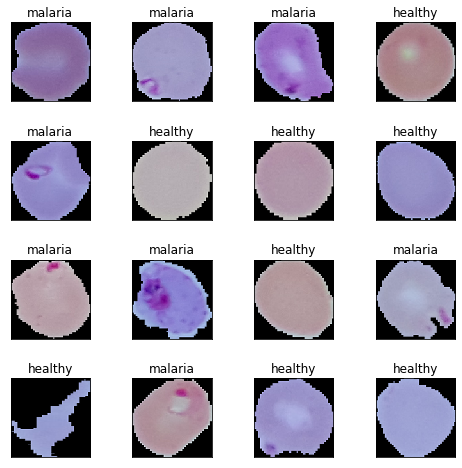

In [34]:
plt.figure(1 , figsize = (8 , 8))
n = 0 
for i in range(16):
    n += 1 
    r = np.random.randint(0 , train_data.shape[0] , 1)
    plt.subplot(4 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(train_data[r[0]]/255.)
    plt.title('{}'.format(train_labels[r[0]]))
    plt.xticks([]) , plt.yticks([])

In [35]:
BATCH_SIZE = 64
NUM_CLASSES = 2
EPOCHS = 25
INPUT_SHAPE = (125, 125, 3)

In [ ]:
train_imgs_scaled = train_data / 255.
val_imgs_scaled = val_data / 255.

In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
val_labels_enc = le.transform(val_labels)

print(train_labels[:6], train_labels_enc[:6])

NameError: name 'train_labels' is not defined